# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Emmanuel Oluwaloni</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("winequality.csv")
display(data.head(10))
display(data.tail(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
print("\n")
print("*"*20, "Info About The Dataset","*"*20)
display(data.info())

print("\n")
print("*"*20, "Descripion of Each Features of the Dataset","*"*20)
display(data.describe())



******************** Info About The Dataset ********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None



******************** Descripion of Each Features of the Dataset ********************


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print("*"*20, "No Of Quality Ratings", "*"*20)
data.quality.sort_values().value_counts()

******************** No Of Quality Ratings ********************


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Exploratory Data Analysis

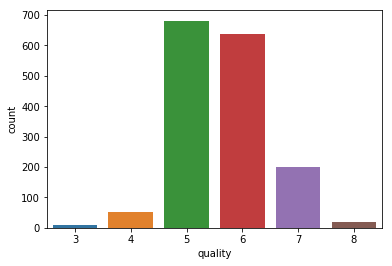

In [5]:
# Our label Distribution (countplot)
sns.countplot(x="quality", data = data)

In [6]:
columns = data.columns

In [7]:
def plot_dist(list):
    """This Function Plot The Distribution Curve For Each Column
    
    Args:
        list: The list of columns to plot the distribution plot.
    Returns:
        Distribution Plot
    
    """
    
    for i in list:
        sns.kdeplot(data[i], color="r")
        plt.title("The Distribution Curve For " + i)
        plt.xlabel(i)
        plt.show()

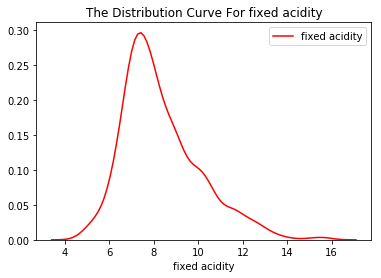

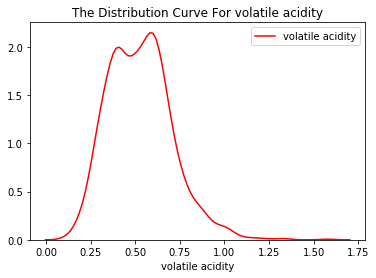

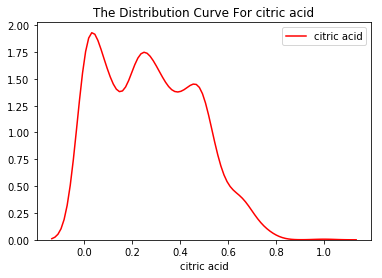

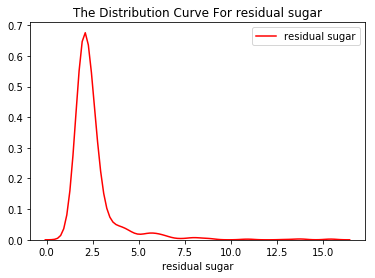

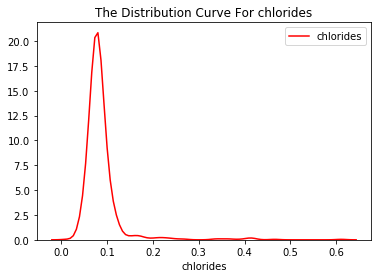

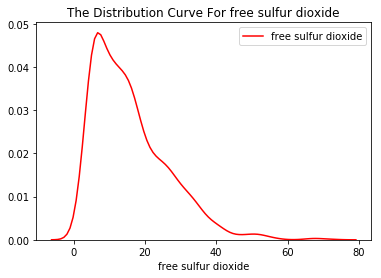

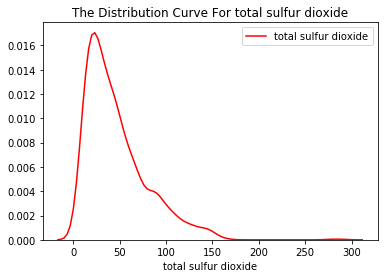

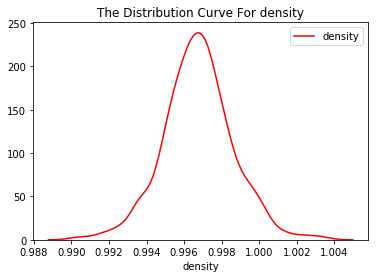

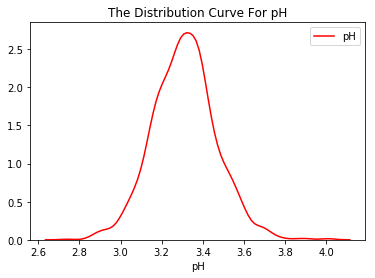

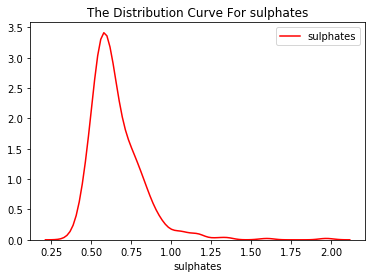

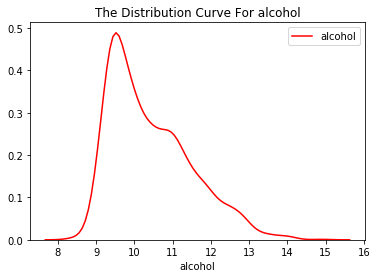

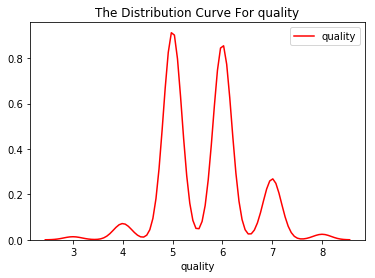

In [8]:
plot_dist(columns)

In [9]:
quality_3 = data.quality == 3
quality_4 = data.quality == 4
quality_5 = data.quality == 5
quality_6 = data.quality == 6
quality_7 = data.quality == 7
quality_8 = data.quality == 8

quality_list = [quality_3, quality_4, quality_5, quality_6, quality_7, quality_8]
quality_num = [3, 4, 5, 6, 7, 8]
quality_rates = data.quality.sort_values().unique()
columns = [col for col in data.columns if col != "quality"]

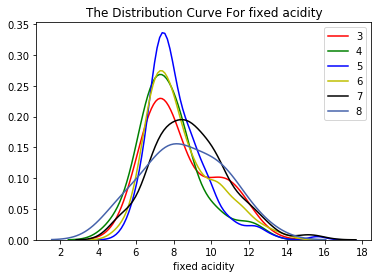

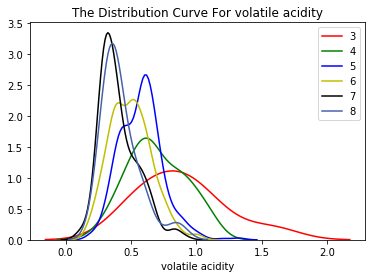

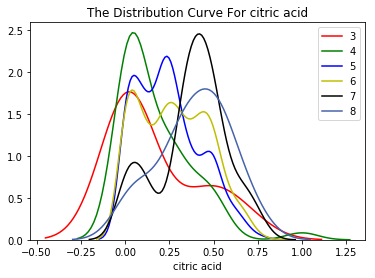

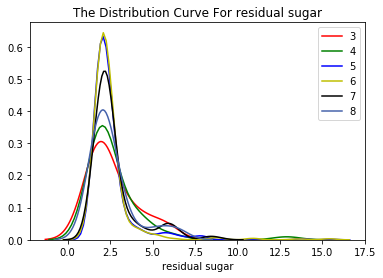

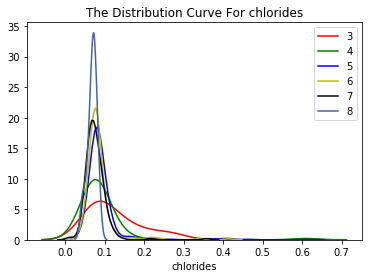

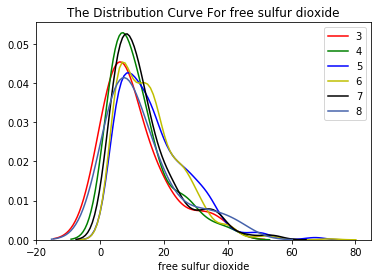

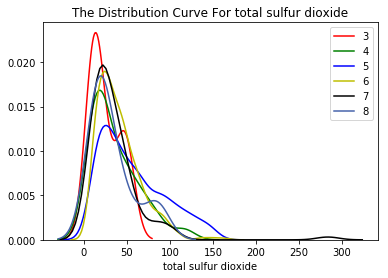

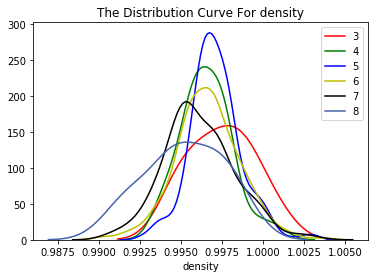

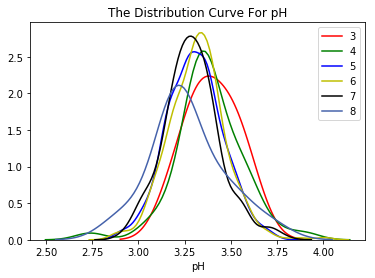

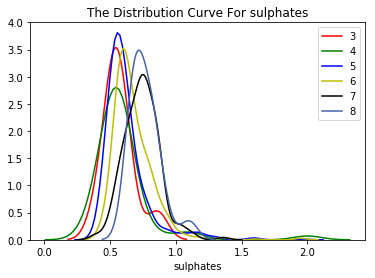

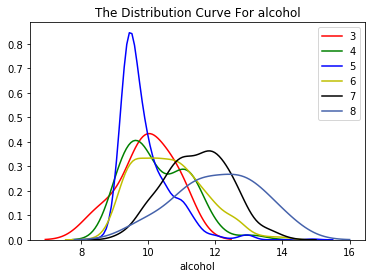

In [10]:
# Example EDA (distplot)

def plot_dist(list):
    """This Function Plot The Distribution Curve For Each Quality For All The Column
    
    Args:
        list: The list of columns to plot the distribution plot.
    Returns:
        Distribution Plot
    
    """
    
    for i in list:
        sns.kdeplot(data[quality_3][i], color="r")
        sns.kdeplot(data[quality_4][i], color="g")
        sns.kdeplot(data[quality_5][i], color="b")
        sns.kdeplot(data[quality_6][i], color="y")
        sns.kdeplot(data[quality_7][i], color="k")
        sns.kdeplot(data[quality_8][i], color="#4562AB")
        plt.title("The Distribution Curve For " + i)
        plt.xlabel(i)
        plt.legend(quality_rates)
        plt.show()
        
plot_dist(columns)

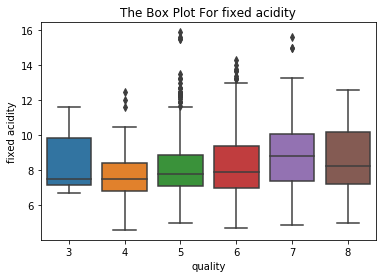

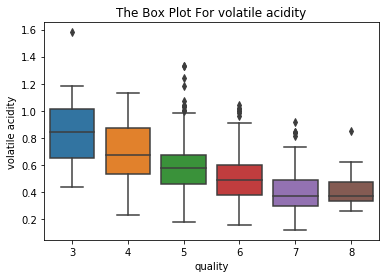

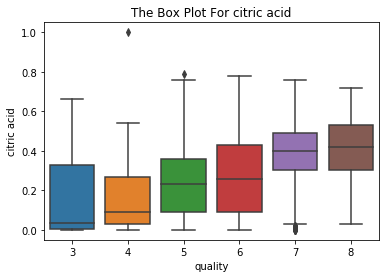

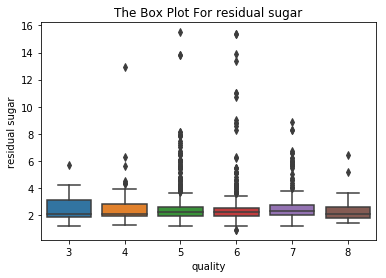

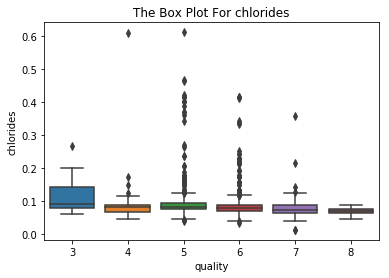

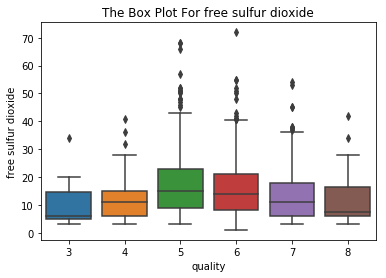

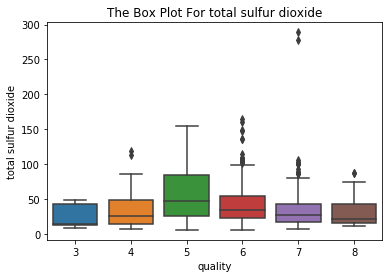

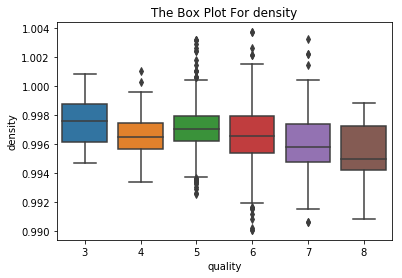

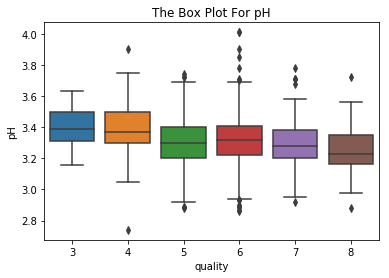

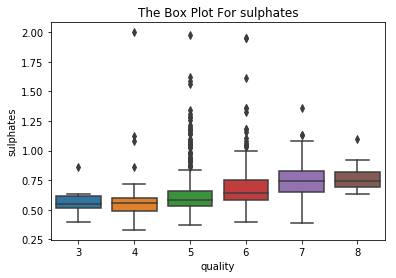

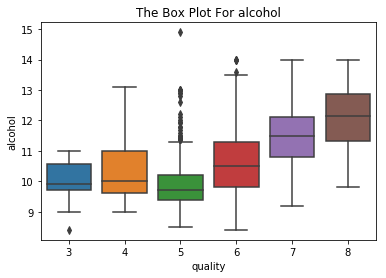

In [11]:
def plot_boxplot(list):
    """This Function Plot Boxplot For Each Quality For All The Columns 
    
    Args:
        list: The list of columns to plot the distribution plot.
    Returns:
        BoxPlot
    
    """
    
    for i in list:
        sns.boxplot(x="quality", y=i, data=data)
        plt.title("The Box Plot For " + i)
        plt.ylabel(i)
        #plt.legend(quality_rates)
        plt.show()
        
plot_boxplot(columns)

In [12]:
def stat_quality(columns, quality, quality_no):
    """
    This Function Will Print Out The Mean, Median and Standard Deviation of the columns for Each Quality
    
    Args: 
        List of columns (List)
        List of quality (List)
    Return:
        String of the result (Str)
    
    """
    for col in columns:
        print("*"*20,"Stats Info About Each Quality For Column ", col, "*"*20)
        print("-"*50)
        print("|", "  Quality  ", "|", "  Mean  ", "|", "  Median  ", "|", "  Std   ","|")
        print("-"*50)
        print()
        for i, cate in enumerate(quality):
            print(" "*5, quality_no[i], 
                  " "*9, "{:.3f}".format(data[cate][col].mean()),
                  " "*5, "{:.3f}".format(data[cate][col].median()),
                  " "*5, "{:.3f}".format(data[cate][col].std()),"\n")

In [13]:
stat_quality(columns, quality_list, quality_num)

******************** Stats Info About Each Quality For Column  fixed acidity ********************
--------------------------------------------------
|   Quality   |   Mean   |   Median   |   Std    |
--------------------------------------------------

      3           8.360       7.500       1.771 

      4           7.779       7.500       1.627 

      5           8.167       7.800       1.564 

      6           8.347       7.900       1.798 

      7           8.872       8.800       1.992 

      8           8.567       8.250       2.120 

******************** Stats Info About Each Quality For Column  volatile acidity ********************
--------------------------------------------------
|   Quality   |   Mean   |   Median   |   Std    |
--------------------------------------------------

      3           0.885       0.845       0.331 

      4           0.694       0.670       0.220 

      5           0.577       0.580       0.165 

      6           0.497       0.490       0

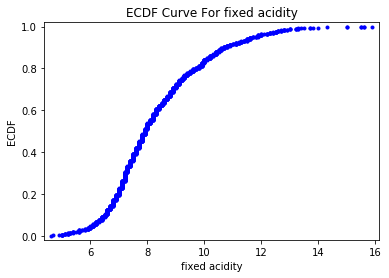

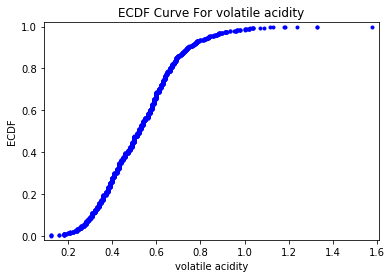

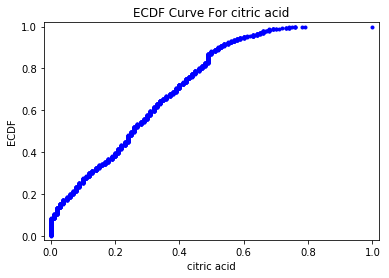

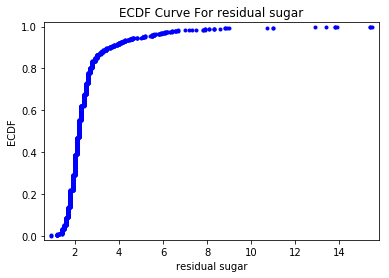

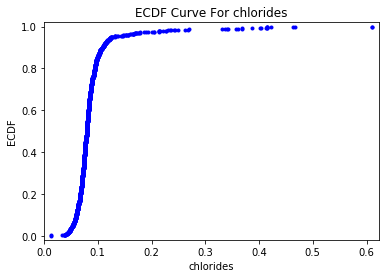

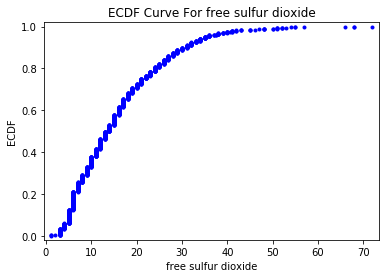

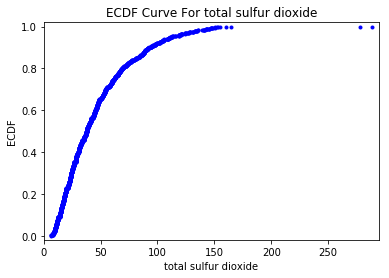

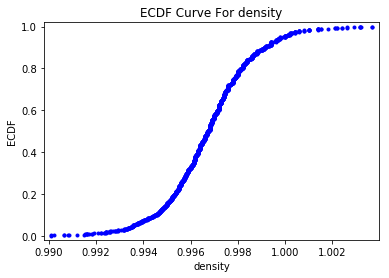

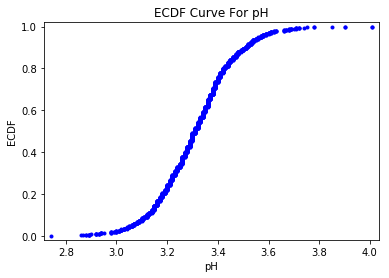

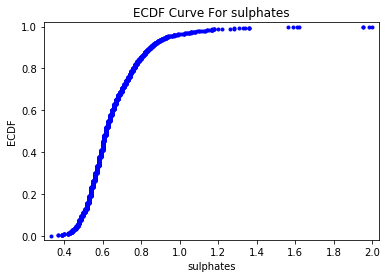

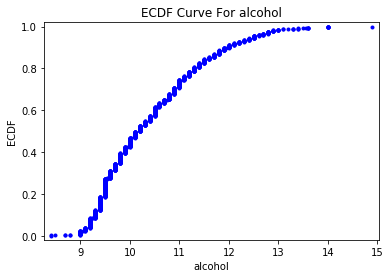

In [14]:
def plot_ECDF(list):
    
    """This Function Plot The Empirical Cumulative Distribution Function (ECDF) Curve For All Columns
    
    Args:
        list: The list of columns to plot the plot.
    Returns:
        ECDF Curve Plot
    
    """
    for i in list:
        x1 = np.sort(data[i])
        y1 = np.arange(1, len(x1)+1) / len(x1)
        _ = plt.plot(x1, y1, marker='.', linestyle='none', alpha = 1, c = "b")
        _ = plt.title("ECDF Curve For " + i)
        _ = plt.xlabel(i)
        _ = plt.ylabel('ECDF')
        plt.margins(0.02) # Keeps data off plot edges
        plt.show()
        
plot_ECDF(columns)
    

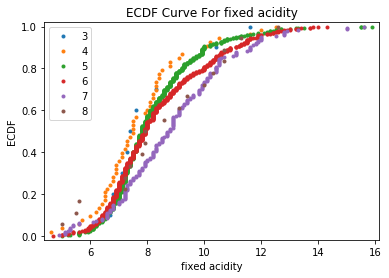

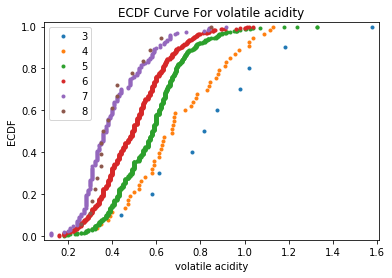

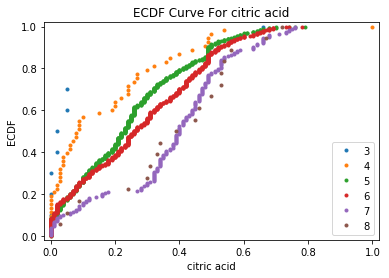

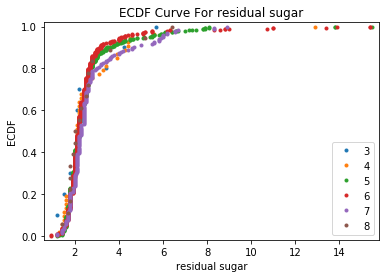

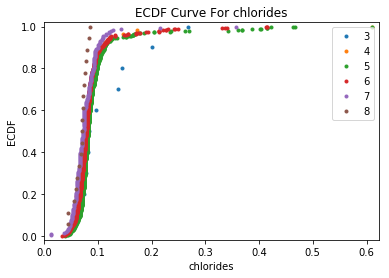

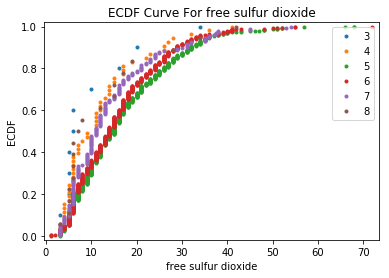

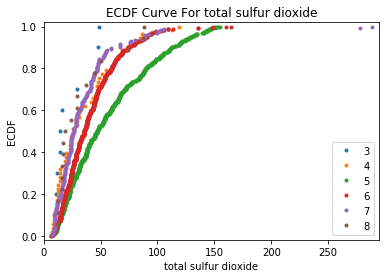

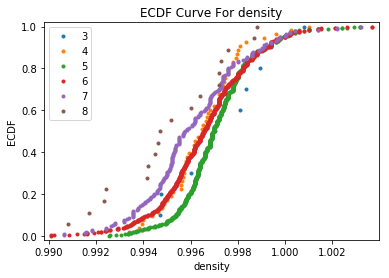

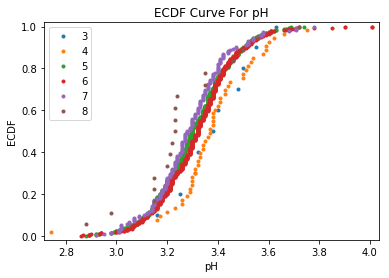

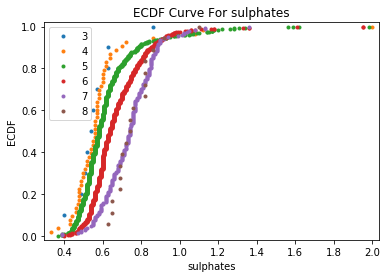

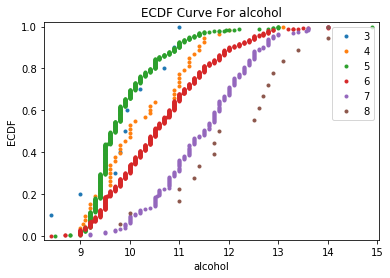

In [15]:
def plot_ECDF(columns, quality, quality_num):
    
    """This Function Plot The Empirical Cumulative Distribution Function (ECDF) Curve For Each Quality For All Columns
    
    Args:
        columns: The list of columns to plot the plot. (List)
        quality: The list of quality conditions for the DataFrame. (List)
        quality_num: The list of quality use for the legend. (List)
        
    Returns:
        ECDF Curve Plot
    
    """
    for i in columns:
        for j in quality:
            x1 = np.sort(data[j][i])
            y1 = np.arange(1, len(x1)+1) / len(x1)
            _ = plt.plot(x1, y1, marker='.', linestyle='none', alpha = 1)
        _ = plt.title("ECDF Curve For " + i)
        _ = plt.xlabel(i)
        _ = plt.ylabel('ECDF')
        plt.margins(0.02) # Keeps data off plot edges
        plt.legend(quality_num)
        plt.show()
        
plot_ECDF(columns, quality_list, quality_num)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [16]:
duplicate = data.drop_duplicates()
print(data.shape)
print(duplicate.shape)

(1599, 12)
(1359, 12)


<h3>Are there any duplicated values?</h3>
Yes There Are Duplicated Values

<h3>Do we need to do feature scaling?</h3> <br>
Yes and No, It depends on the machine learning algorithm we use, if we use a logical regression, Support Vector Machine (SVM) or Neutral Network we need to perform scaling because it can not handle overfitting values pretty well 
But if we use an algorithm like decision tree we don't really need to scale our values because it has little to no effect on it

In [17]:
X = duplicate.drop(["quality"], axis=1)
y = duplicate.quality

I Choose to work with the dataset with no duplicate values

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

<h3>Do we need to generate new features?</h3>
I am not sure we need to

In [19]:
# Split Train and Test dataset. (0.7/0.3)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y, test_size=0.3, stratify=y, random_state=7)

In [20]:
print("The shape for X_train and X_test is {} and {} respectively".format(X_train.shape, X_test.shape))
print("The shape for X_train_scaled and X_test_scale {} and {} respectively".format(X_train_scale.shape, X_test_scale.shape))

The shape for X_train and X_test is (951, 11) and (408, 11) respectively
The shape for X_train_scaled and X_test_scale (951, 11) and (408, 11) respectively


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models
dct_clf = DecisionTreeClassifier()
log_reg = LogisticRegression()
svc_clf = SVC()

#Fit models
dct_clf.fit(X_train, y_train)
log_reg.fit(X_train_scale, y_train)
svc_clf.fit(X_train_scale, y_train)

SVC()

In [22]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score
y_pred_dct = dct_clf.predict(X_test)
y_pred_log = log_reg.predict(X_test_scale)
y_pred_svc = svc_clf.predict(X_test_scale)

************************* Report For Decision Trees *************************
Accuracy Score :  0.5245098039215687
Precision Score:  0.5245098039215687
Recall Score:  0.5245098039215687
F1 Score:  0.5245098039215687
Confusion Matrix: 



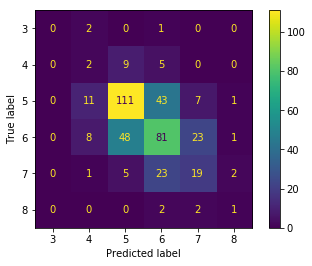

In [23]:
print("*"*25, "Report For Decision Trees", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_dct))
print("Precision Score: ", precision_score(y_test, y_pred_dct, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred_dct, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred_dct, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(dct_clf, X_test, y_test)

************************* Report For Logistic Regression *************************
Accuracy Score :  0.5808823529411765
Precision Score:  0.5808823529411765
Recall Score:  0.5808823529411765
F1 Score:  0.5808823529411765
Confusion Matrix: 



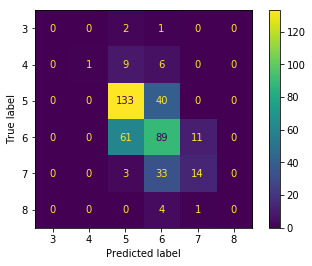

In [24]:
print("*"*25, "Report For Logistic Regression", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test_scale, y_pred_log))
print("Precision Score: ", precision_score(y_test_scale, y_pred_log, average='micro'))
print("Recall Score: ", recall_score(y_test_scale, y_pred_log, average='micro'))
print("F1 Score: ", f1_score(y_test_scale, y_pred_log, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(log_reg, X_test_scale, y_test_scale)

************************* Report For Support Vector Machine *************************
Accuracy Score :  0.6053921568627451
Precision Score:  0.6053921568627451
Recall Score:  0.6053921568627451
F1 Score:  0.6053921568627451
Confusion Matrix: 



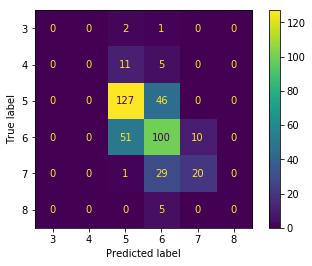

In [25]:
print("*"*25, "Report For Support Vector Machine", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test_scale, y_pred_svc))
print("Precision Score: ", precision_score(y_test_scale, y_pred_svc, average='micro'))
print("Recall Score: ", recall_score(y_test_scale, y_pred_svc, average='micro'))
print("F1 Score: ", f1_score(y_test_scale, y_pred_svc, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(svc_clf, X_test_scale, y_test_scale)

In [26]:
param_dtc = {
    "criterion":["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "max_features": ["auto", 'sqrt', "log2",]
}

param_log = {
    "C": [0.05, 0.01, 0.5, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "max_iter": [1000]
}

param_svc = {
    "C": [0.05, 0.01, 0.5, 0.1, 1, 10, 100]
}

In [27]:
# Grid Search For DTC
gs_dtc = GridSearchCV(dct_clf, param_dtc, cv=5, n_jobs=-1)
gs_dtc.fit(X_train, y_train)

print("Best Params: ", gs_dtc.best_params_)
print("Best Score: ", gs_dtc.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
Best Score:  0.5457150730228713


In [28]:
# Grid Search For LogReg
gs_lr = GridSearchCV(log_reg, param_log, cv=3, n_jobs=-1)
gs_lr.fit(X_test_scale, y_test_scale)

print("Best Params: ", gs_lr.best_params_)
print("Best Score: ", gs_lr.best_score_)

Best Params:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Best Score:  0.6151960784313726


In [29]:
# Grid Search For SVC
gs_svc = GridSearchCV(svc_clf, param_svc, cv=3, n_jobs=-1)
gs_svc.fit(X_test_scale, y_test_scale)

print("Best Params: ", gs_svc.best_params_)
print("Best Score: ", gs_svc.best_score_)

Best Params:  {'C': 1}
Best Score:  0.6102941176470589


In [30]:
y_pred_gs_dtc = gs_dtc.predict(X_test)
y_pred_gs_log = gs_lr.predict(X_test_scale)
y_pred_gs_svc = gs_svc.predict(X_test_scale)

************************* Report For GridSeach - Decision Trees *************************
Accuracy Score :  0.571078431372549
Precision Score:  0.571078431372549
Recall Score:  0.571078431372549
F1 Score:  0.571078431372549
Confusion Matrix: 



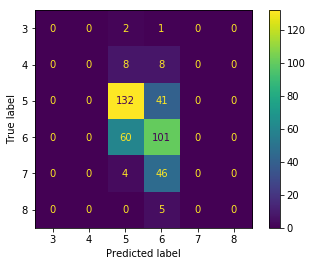

In [31]:
print("*"*25, "Report For GridSeach - Decision Trees", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_gs_dtc))
print("Precision Score: ", precision_score(y_test, y_pred_gs_dtc, average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred_gs_dtc, average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred_gs_dtc, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(gs_dtc, X_test, y_test)

************************* Report For GridSearch - Logistic Regression *************************
Accuracy Score :  0.6372549019607843
Precision Score:  0.6372549019607843
Recall Score:  0.6372549019607843
F1 Score:  0.6372549019607843
Confusion Matrix: 



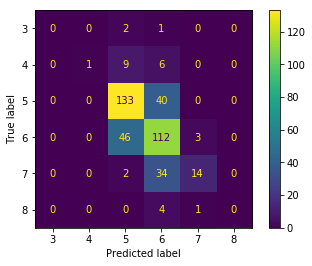

In [32]:
print("*"*25, "Report For GridSearch - Logistic Regression", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test_scale, y_pred_gs_log))
print("Precision Score: ", precision_score(y_test_scale, y_pred_gs_log, average='micro'))
print("Recall Score: ", recall_score(y_test_scale, y_pred_gs_log, average='micro'))
print("F1 Score: ", f1_score(y_test_scale, y_pred_gs_log, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(gs_lr, X_test_scale, y_test_scale)

************************* Report For GridSearch - Support Vector Machine *************************
Accuracy Score :  0.6887254901960784
Precision Score:  0.6887254901960784
Recall Score:  0.6887254901960784
F1 Score:  0.6887254901960784
Confusion Matrix: 



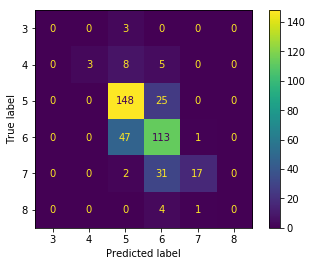

In [33]:
print("*"*25, "Report For GridSearch - Support Vector Machine", "*"*25)
print("Accuracy Score : ", accuracy_score(y_test_scale, y_pred_gs_svc))
print("Precision Score: ", precision_score(y_test_scale, y_pred_gs_svc, average='micro'))
print("Recall Score: ", recall_score(y_test_scale, y_pred_gs_svc, average='micro'))
print("F1 Score: ", f1_score(y_test_scale, y_pred_gs_svc, average='micro'))
print("Confusion Matrix: \n")
plot_confusion_matrix(gs_svc, X_test_scale, y_test_scale)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

<h3>The best performing model</h3>

- My best performing model for me was the Support Vector Classifier (SVC) with Regularization parameter(C) equal to 1, this was gotten when I used GridSearch Cross Validation

- I choose SVC because it handles imbalanced data best than the other machine learning algorithm I used 

<h3> Comment </h3>

I found out that the dataset is imbalance because quality 8, quality 4 and quality 3 has very low entry in the dataset, the following is what I would do to improve the model
- Get More Dataset
- Up-sample Minority Class
- Down-sample Majority Class
- Use Stacking 
- Use Bagging